In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Load the wine dataset into a DataFrame
df_wine = load_wine(as_frame=True)
df_wine = df_wine.frame
df_wine.columns = [ 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity',
                   'Hue', 'OD280/OD315 of diluted wines',
                   'Proline', 'Class label']

df_wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:

from sklearn.model_selection import train_test_split 

X, y = df_wine.iloc[:, 0:-1 ].values, df_wine.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, 
                                                    test_size = 0.3, random_state = 1, stratify = y
)


In [3]:
ex = np.array([1, 2, 3, 4, 5])  

print('Standardization', np.around((ex - ex.mean())/ex.std(), 3))
print('MinMax Scaler', (ex - ex.min())/ex.max() )

Standardization [-1.414 -0.707  0.     0.707  1.414]
MinMax Scaler [0.  0.2 0.4 0.6 0.8]


In [4]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_train_std = stdsc.fit_transform(X_train) 
X_test_std = stdsc.transform(X_test)

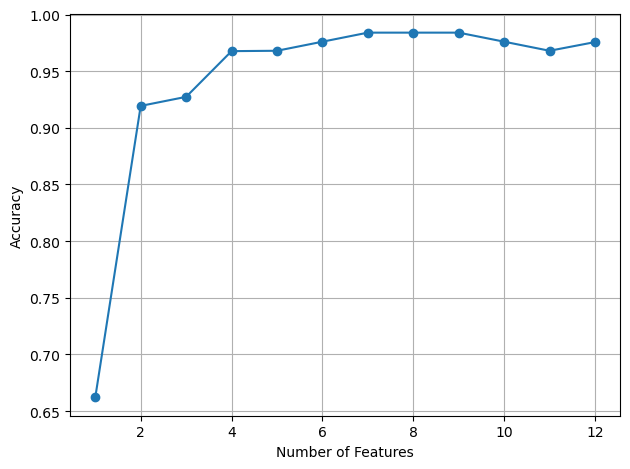

In [5]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
scores= []
feature_list = list(range(X_train_std.shape[1]-1, 0, -1))
for i in feature_list:
    knn = KNeighborsClassifier(n_neighbors=5) 
    sfs = SequentialFeatureSelector(knn, 
                                   n_features_to_select=i, 
                                   direction='backward', 
                                   scoring='accuracy', 
                                   cv=5, n_jobs=-1) 
    sfs.fit(X_train_std, y_train)
    score= cross_val_score(knn, X_train_std[:, sfs.get_support()], y_train, cv=5).mean() 
    scores.append(score) 

plt.plot(feature_list, scores, marker='o') 
plt.xlabel('Number of Features') 
plt.ylabel('Accuracy') 
plt.grid() 
plt.tight_layout() 
plt.show()

In [6]:
sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=5), 
                               direction= 'backward', 
                               scoring='accuracy', 
                               cv=5, n_jobs=-1) 
sfs.fit(X_train_std, y_train) 
df_wine.columns[sfs.get_support(indices=True)]

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

 1) Proline                        0.179927
 2) Color intensity                0.153158
 3) Flavanoids                     0.146123
 4) Alcohol                        0.138224
 5) OD280/OD315 of diluted wines   0.114818
 6) Hue                            0.077525
 7) Total phenols                  0.058236
 8) Malic acid                     0.030856
 9) Alcalinity of ash              0.030000
10) Proanthocyanins                0.025713
11) Magnesium                      0.025135
12) Nonflavanoid phenols           0.011548
13) Ash                            0.008738


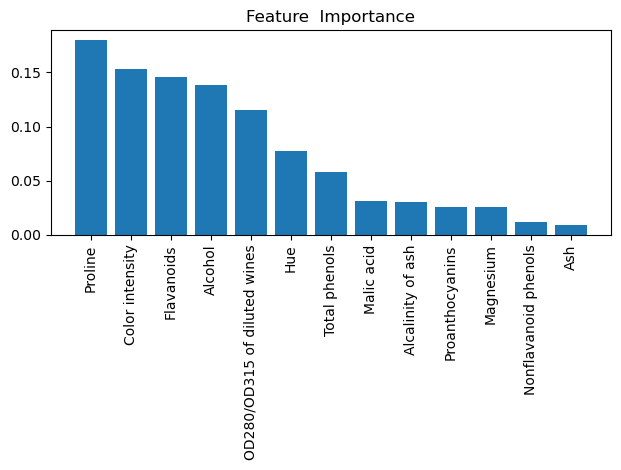

In [18]:
from sklearn.ensemble import RandomForestClassifier 
feat_labels = df_wine.columns[:-1]
forest = RandomForestClassifier(n_estimators= 500, 
                               random_state= 1) 
forest.fit(X_train, y_train) 
importance = forest.feature_importances_ 
indices = np.argsort(importance)[::-1]
for i in range(X_train_std.shape[1]): 
    print("%2d) %-*s %f" %(i+1,30, feat_labels[indices[i]],importance[indices[i]])) 


plt.bar(range(X_train.shape[1]), importance[indices], align = 'center') 
plt.title('Feature  Importance') 
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim(-1, X_train.shape[1]) 
plt.tight_layout() 
plt.show()